### Day18 - Decision Tree- Titanic Dataset
Oct 28, 2019


**Advantages of Decision Tree**
* Can be used to solve Classification and Regression Problem
* Simple to understand, interpret and visualize
* Little effort is required for data preparation
* Can handle both numerical and categorical data
* Non linear parameters don't affect its performance

**Disadvantage of Decision Tree**
* Overfitting - occurs when the algorithm captures nosie in the data
* High Variance
* Low biased tree - A highy complicated tree tends to have a low bias which    makes it difficult for model to work with new data

**Common Terms in Decision Tree**
* Entropy - the measure of randomness or unpredictability on the dataset
* Information Gain - it is a decrease in entropy after the dataset is split
* Leaf Node - carries the classification or decision
* Root Node - Top most decision is known as the root node

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
#import pandas_profiling

%matplotlib inline

In [2]:
titanic = pd.read_csv(r'kaggle titanic/train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

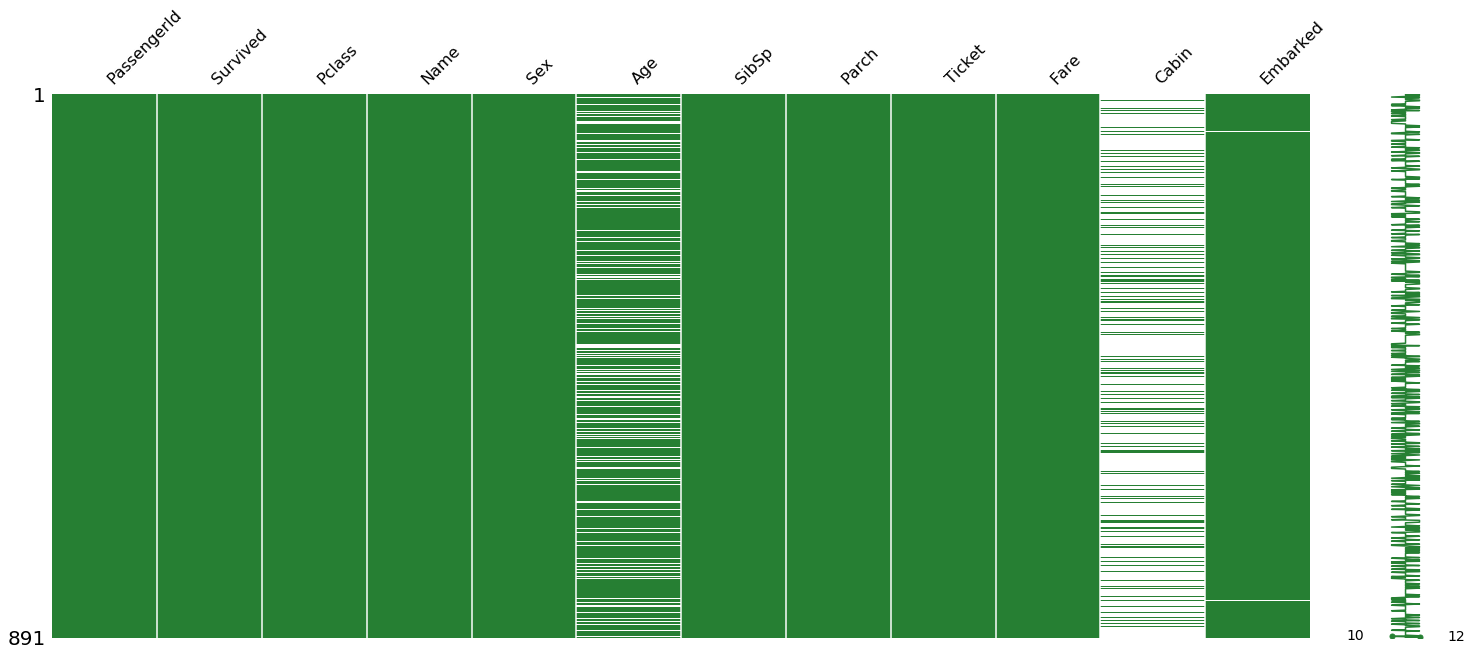

In [7]:
missingno.matrix(titanic, color=(0.15, 0.5, 0.2))

In [8]:
pandas_profiling.ProfileReport(titanic)

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


#### SEX (Male/Female)

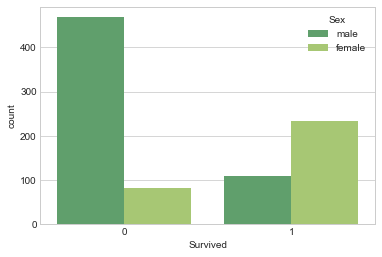

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=titanic, hue='Sex', palette='summer')

Text(0,0.5,'Survived')

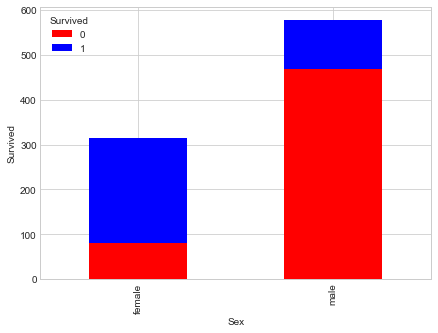

In [9]:
temp = pd.crosstab(titanic.Sex, titanic.Survived)
temp.plot(kind='bar', stacked=True, color=['red', 'blue'], figsize=(7,5)).set_ylabel('Survived')
#plt.set_ylabel('Survived')

#### PClass (Passenger Class)

In [10]:
titanic.Pclass.unique()

array([3, 1, 2], dtype=int64)

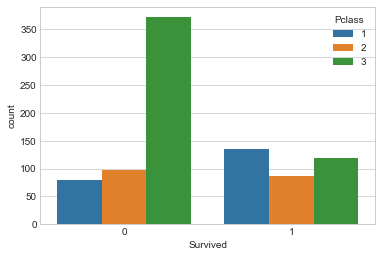

In [11]:
sns.countplot(x='Survived', data=titanic, hue='Pclass')

Text(0,0.5,'Survived')

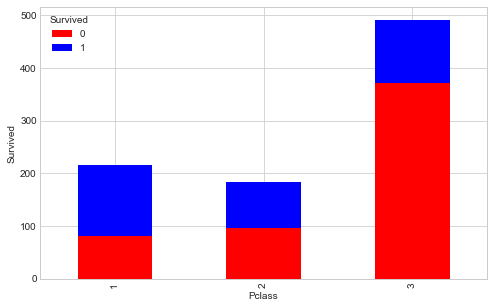

In [12]:
temp2 = pd.crosstab(titanic.Pclass,titanic.Survived)
temp2.plot(kind='bar', stacked=True, color=['red', 'blue'], figsize=(8,5)).set_ylabel('Survived')

#### Age - Passenger Age

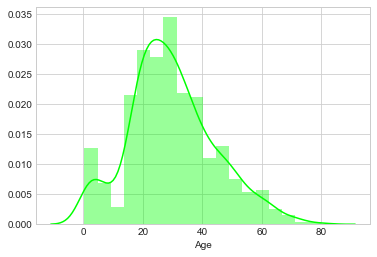

In [13]:
sns.set_style('whitegrid')
sns.distplot(titanic.Age.dropna(), bins=18, color='lime')

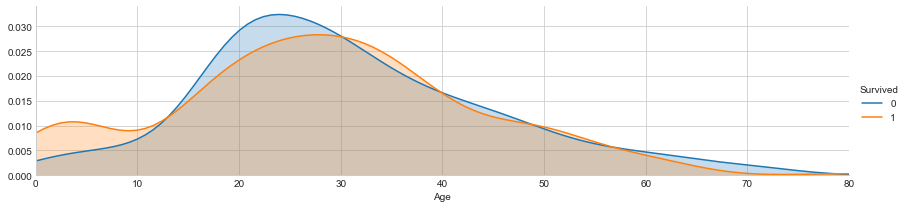

In [14]:
facet = sns.FacetGrid(data=titanic, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend()

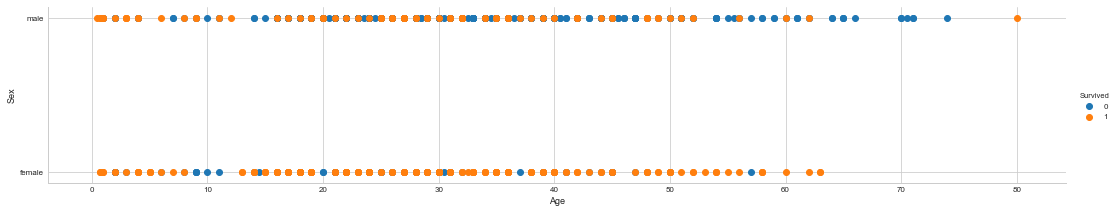

In [15]:
#facet = sns.FacetGrid(data=titanic, hue='Survived', aspect=4)
sns.set_context(font_scale=2, rc={'font.size':8, 'axes.labelsize':9})
sns.set_style('whitegrid')
sns.FacetGrid(titanic, hue='Survived', aspect=5)\
.map(plt.scatter, 'Age', 'Sex')\
.add_legend()

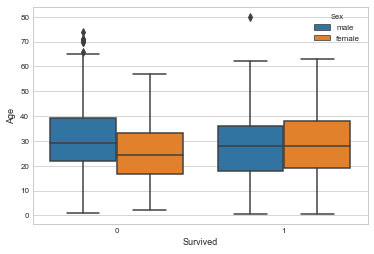

In [16]:
sns.boxplot(x='Survived',y='Age', data=titanic, hue='Sex')

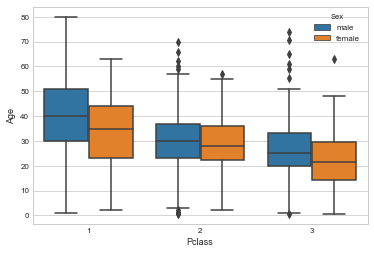

In [17]:
sns.boxplot(x='Pclass',y='Age', data=titanic, hue='Sex')

#### Embarked
Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [18]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

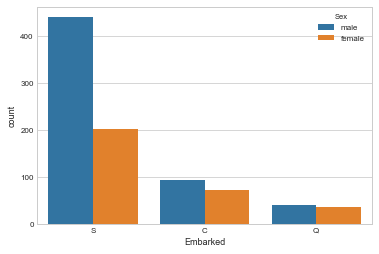

In [19]:
sns.countplot('Embarked', data=titanic, hue='Sex')

Text(0,0.5,'Survived')

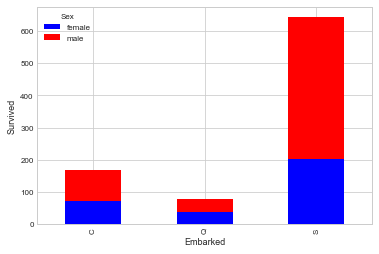

In [20]:
temp2 = pd.crosstab(titanic.Embarked, titanic.Sex)
temp2.plot(kind='bar',stacked=True, color=['blue', 'red']).set_ylabel('Survived')

Text(0,0.5,'Survived')

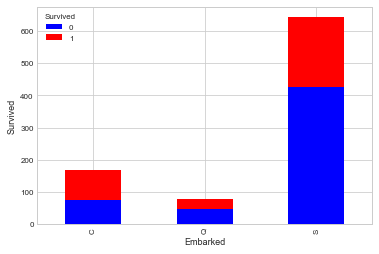

In [21]:
temp3 = pd.crosstab(titanic.Embarked, titanic.Survived)
temp3.plot(kind='bar', stacked=True, color=['blue', 'red']).set_ylabel('Survived')

#### SibSp (Sibling/Spouse)
Number of Siblings/Spouses Aboard

In [22]:
titanic.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

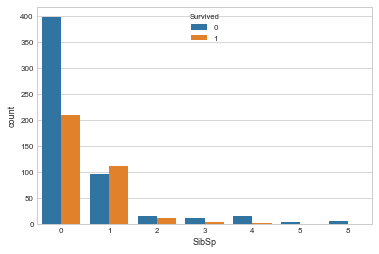

In [23]:
sns.countplot(x='SibSp', data=titanic, hue='Survived')

#### Parch (Passenger with Parents/children)
Number of Parents/Children Aboard

In [24]:
titanic.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

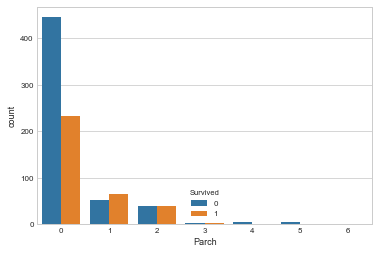

In [25]:
sns.countplot(x='Parch', data=titanic, hue='Survived')

#### Cleaning the Data
1. Dropping the Cabin column because too much missing data
2. Do imputation on the age column
3. Convert categorical data to numerical representation

In [26]:
#dropping the Cabin column
titanic.drop('Cabin', axis = 1, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


##### Imputation

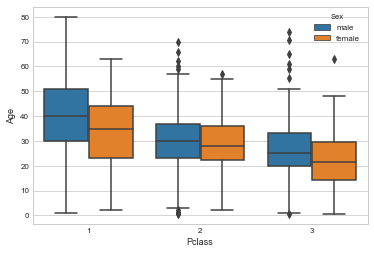

In [27]:
sns.boxplot(x='Pclass',y='Age', data=titanic, hue='Sex')

In [28]:
pclass1 = titanic[titanic['Pclass'] == 1]
pclass2 = titanic[titanic['Pclass'] == 2]
pclass3 = titanic[titanic['Pclass'] == 3]

print('Pclass1_Male average age:', pclass1[pclass1['Sex'] == 'male']['Age'].mean())
print('Pclass1_Female average age:',pclass1[pclass1['Sex'] == 'female']['Age'].mean())

print('Pclass2_Male average age:', pclass2[pclass2['Sex'] == 'male']['Age'].mean())
print('Pclass2_Female average age:',pclass2[pclass2['Sex'] == 'female']['Age'].mean())

print('Pclass3_Male average age:', pclass3[pclass3['Sex'] == 'male']['Age'].mean())
print('Pclass3_Female average age:',pclass3[pclass3['Sex'] == 'female']['Age'].mean())

Pclass1_Male average age: 41.28138613861386
Pclass1_Female average age: 34.61176470588235
Pclass2_Male average age: 30.74070707070707
Pclass2_Female average age: 28.722972972972972
Pclass3_Male average age: 26.507588932806325
Pclass3_Female average age: 21.75


In [29]:
#perform imputation on the age column
#use the average age per class by sex

def imputeAge(cols):
    Age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]
    
    if pd.isnull(Age):
        if Sex == 'male':
            if Pclass == 1:
                return 41
            elif Pclass == 2:
                return 30
            else:
                return 26
        else:
            if Pclass == 1:
                return 34
            elif Pclass == 2:
                return 28
            else:
                return 21
    else:
        return Age


In [30]:
titanic['Age'] = titanic[['Age', 'Pclass', 'Sex']].apply(imputeAge, axis=1 )

#check if there are still null values
titanic[titanic['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


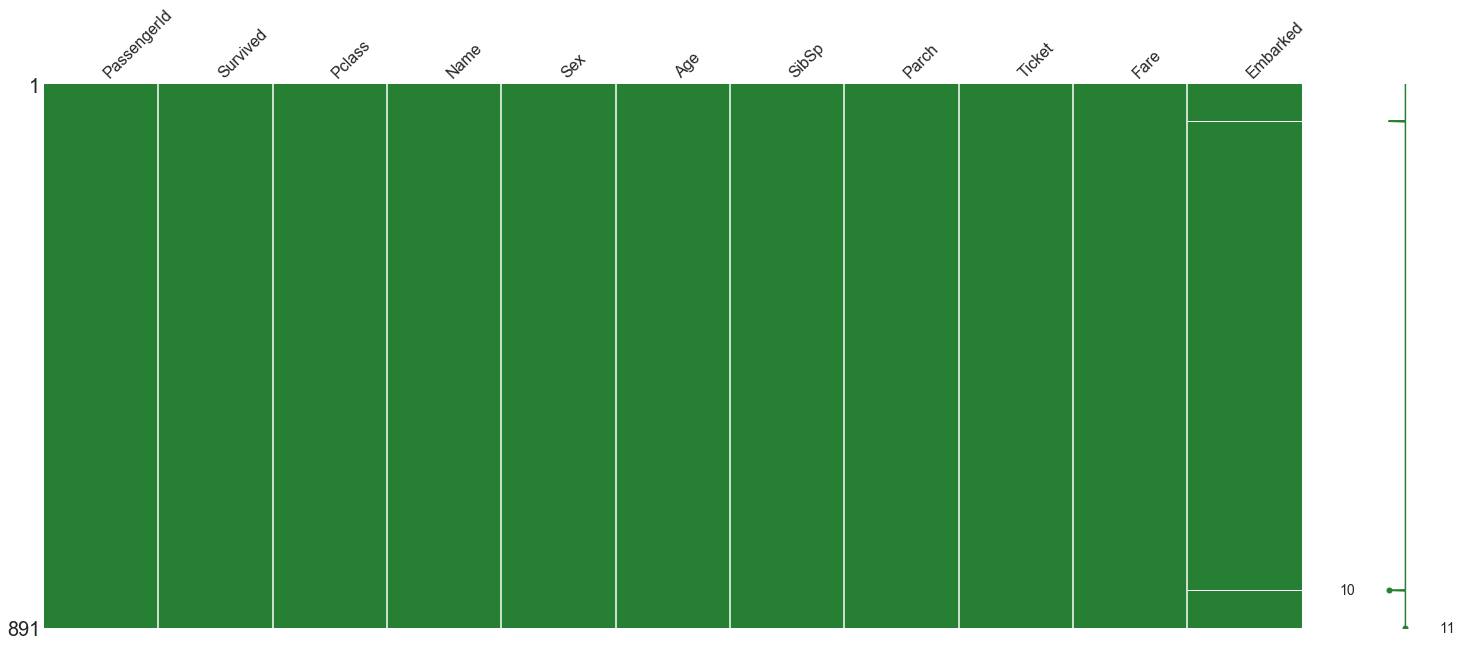

In [31]:
missingno.matrix(titanic, color=(0.15, 0.5, 0.2))

In [32]:
titanic.dropna(inplace = True)

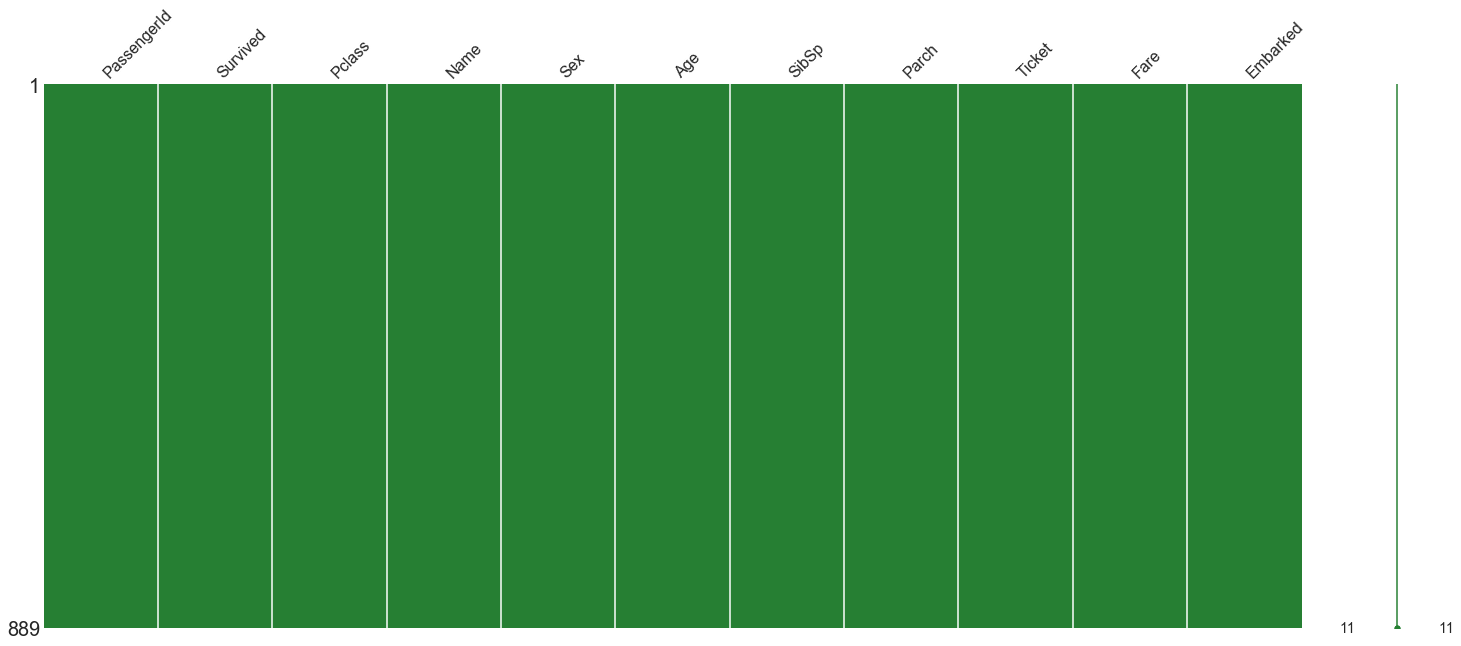

In [33]:
missingno.matrix(titanic, color=(0.15, 0.5, 0.2))

##### Label Encoding and One Hot Encoding
We need to label encode the categorical features to get its equivalent numeric representation.
After which, we will perform one hot encoding. Note that we need to drop fields with string values to be able to use one hot encoding

In [34]:
#use LabelEncoder for the categorigal values
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#drop columns that will not be used
titanic.drop(['PassengerId','Name', 'Ticket'], axis=1, inplace=True)

le = LabelEncoder()
titanic['Sex'] = le.fit_transform(titanic['Sex'])
titanic['Embarked'] = le.fit_transform(titanic['Embarked'])


In [35]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [36]:
X = titanic.drop('Survived', axis=1)
y = titanic.Survived

onehotencoder = OneHotEncoder(sparse=False)
result = onehotencoder.fit_transform(X[['Pclass','Sex', 'Embarked']])

In [37]:
onehotencoded = pd.DataFrame(data = result, columns=['Pclass1','Pclass2','Pclass3','Female','Male','EmbarkedC','EmbarkedQ', 'EmbarkedS'])

In [38]:
onehotencoded.head()

,Pclass1,Pclass2,Pclass3,Female,Male,EmbarkedC,EmbarkedQ,EmbarkedS
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [39]:
onehotencoded.drop(['Pclass3','Female','EmbarkedQ'], axis=1, inplace=True)
onehotencoded.head()

,Pclass1,Pclass2,Male,EmbarkedC,EmbarkedS
0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0


In [40]:
onehotencoded.shape

(889, 5)

In [41]:
titanic.drop(['Pclass','Sex','Embarked'], axis=1, inplace=True)
titanic.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [42]:
titanic.shape

(889, 5)

In [43]:
onehotencoded.reset_index(drop=True, inplace=True)
titanic.reset_index(drop=True, inplace=True)
titanic_encoded = pd.concat([onehotencoded,titanic], axis=1)
titanic_encoded.head()

,Pclass1,Pclass2,Male,EmbarkedC,EmbarkedS,Survived,Age,SibSp,Parch,Fare
0,0.0,0.0,1.0,0.0,1.0,0,22.0,1,0,7.2500
1,1.0,0.0,0.0,1.0,0.0,1,38.0,1,0,71.2833
2,0.0,0.0,0.0,0.0,1.0,1,26.0,0,0,7.9250
3,1.0,0.0,0.0,0.0,1.0,1,35.0,1,0,53.1000
4,0.0,0.0,1.0,0.0,1.0,0,35.0,0,0,8.0500


In [44]:
titanic_encoded.shape

(889, 10)

### Creating the Model

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = titanic_encoded.drop('Survived', axis=1)
y = titanic_encoded.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [47]:
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",X_test.shape)
print("y_test:",y_test.shape)

X_train: (622, 9)
y_train: (622,)
X_test: (267, 9)
y_test: (267,)


In [76]:
dt = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=7, random_state=100)

In [77]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [78]:
prediction = dt.predict(X_test)

### Getting the Metrics

In [79]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [80]:
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.83      0.85      0.84       167
          1       0.74      0.70      0.72       100

avg / total       0.79      0.79      0.79       267



In [81]:
print(confusion_matrix(y_test, prediction))

[[142  25]
 [ 30  70]]


In [82]:
print(accuracy_score(y_test, prediction))

0.7940074906367042
